In [40]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import os

In [41]:
stock_data = yf.Ticker("^NSEI")
stock_data = stock_data.history(period = "max")
stock_data.to_csv("stockdata.csv")

In [42]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+05:30,23738.199219,23869.550781,23647.199219,23753.449219,189800,0.0,0.0
2024-12-24 00:00:00+05:30,23769.099609,23867.650391,23685.150391,23727.650391,177700,0.0,0.0
2024-12-26 00:00:00+05:30,23775.800781,23854.500000,23653.599609,23750.199219,177700,0.0,0.0


In [43]:
stock_data.index = pd.to_datetime(stock_data.index)

<Axes: xlabel='Date'>

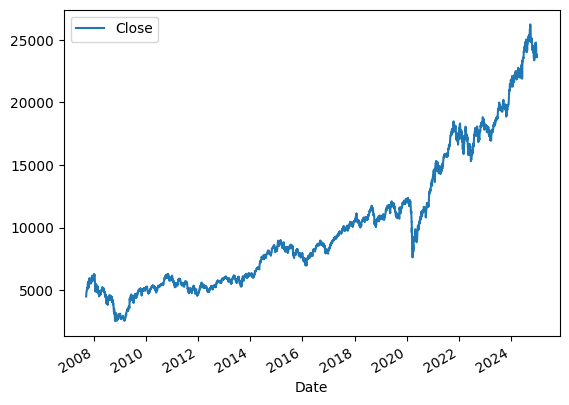

In [44]:
stock_data.plot.line(y = 'Close', use_index = True)

In [45]:
del stock_data['Dividends']
del stock_data['Stock Splits']

In [46]:
stock_data['Tomorrow'] = stock_data['Close'].shift(-1)

In [47]:
stock_data['Target'] = (stock_data['Tomorrow'] > stock_data['Close']).astype(int)

In [48]:
stock_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+05:30,23738.199219,23869.550781,23647.199219,23753.449219,189800,23727.650391,0
2024-12-24 00:00:00+05:30,23769.099609,23867.650391,23685.150391,23727.650391,177700,23750.199219,1
2024-12-26 00:00:00+05:30,23775.800781,23854.500000,23653.599609,23750.199219,177700,23813.400391,1


In [49]:
stock_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+05:30,23738.199219,23869.550781,23647.199219,23753.449219,189800,23727.650391,0
2024-12-24 00:00:00+05:30,23769.099609,23867.650391,23685.150391,23727.650391,177700,23750.199219,1
2024-12-26 00:00:00+05:30,23775.800781,23854.500000,23653.599609,23750.199219,177700,23813.400391,1


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=13)
train = stock_data.iloc[:-100]
test = stock_data.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=13)

In [51]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [52]:
preds = pd.Series(preds, index = test.index)

In [53]:
precision_score(test['Target'],preds)

np.float64(0.5106382978723404)

<Axes: xlabel='Date'>

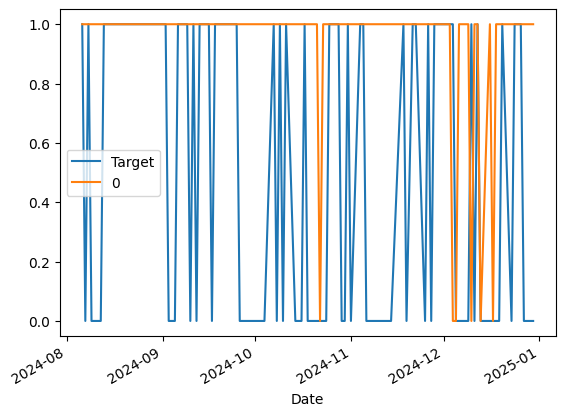

In [54]:
combined = pd.concat([test['Target'], preds], axis = 1)
combined.plot()

In [55]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors]) 
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [56]:
def backtest(data, model, predictors, start = 2000, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [57]:
predictions = backtest(stock_data, model, predictors)

In [58]:
predictions['Predictions'].value_counts()

Predictions
1    1214
0    1023
Name: count, dtype: int64

In [59]:
precision_score(predictions['Target'], predictions['Predictions'])

np.float64(0.5403624382207578)

In [60]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.546267
0    0.453733
Name: count, dtype: float64

In [61]:
horizons = [2,5,60,250,1000]

new_predictors = []
 
for horizon in horizons:
    rolling_averages = stock_data.rolling(horizon).mean()
    ration_column = f'Close_ration_{horizon}'
    stock_data[ration_column] = stock_data['Close'] / rolling_averages['Close']
    trend_column = f"Trend_{horizon}"
    stock_data[trend_column] = stock_data.shift(1).rolling(horizon).sum()['Target']
    new_predictors += [ration_column, trend_column]

In [62]:
stock_data

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ration_2,Trend_2,Close_ration_5,Trend_5,Close_ration_60,Trend_60,Close_ration_250,Trend_250,Close_ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,1.005702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,1.020062,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,1.001603,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,1.009390,2.0,1.035510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00+05:30,23738.199219,23869.550781,23647.199219,23753.449219,189800,23727.650391,0,1.003505,1.0,0.991152,1.0,0.970122,22.0,1.014389,139.0,1.264252,551.0
2024-12-24 00:00:00+05:30,23769.099609,23867.650391,23685.150391,23727.650391,177700,23750.199219,1,0.999457,1.0,0.995127,1.0,0.970713,21.0,1.012887,139.0,1.262182,550.0
2024-12-26 00:00:00+05:30,23775.800781,23854.500000,23653.599609,23750.199219,177700,23813.400391,1,1.000475,1.0,0.999836,2.0,0.973247,22.0,1.013453,139.0,1.262686,550.0


In [63]:
stock_data.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ration_2,Trend_2,Close_ration_5,Trend_5,Close_ration_60,Trend_60,Close_ration_250,Trend_250,Close_ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2011-10-13 00:00:00+05:30,5130.799805,5136.950195,5067.649902,5077.850098,0,5132.299805,1,0.997883,1.0,1.014789,3.0,0.992330,23.0,0.911365,111.0,1.042939,510.0
2011-10-14 00:00:00+05:30,5057.350098,5141.399902,5056.600098,5132.299805,0,5118.250000,0,1.005333,1.0,1.015754,3.0,1.004393,24.0,0.921801,111.0,1.053995,510.0
2011-10-17 00:00:00+05:30,5156.200195,5160.200195,5084.500000,5118.250000,0,5037.500000,0,0.998629,1.0,1.007444,2.0,1.003264,23.0,0.919921,111.0,1.051026,509.0
2011-10-18 00:00:00+05:30,5049.450195,5057.500000,5011.049805,5037.500000,0,5139.149902,1,0.992049,0.0,0.989091,2.0,0.989147,23.0,0.906187,110.0,1.034383,508.0
2011-10-19 00:00:00+05:30,5080.450195,5148.049805,5075.299805,5139.149902,0,5091.899902,0,1.009989,1.0,1.007477,2.0,1.010438,24.0,0.925163,111.0,1.055190,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20 00:00:00+05:30,23960.699219,24065.800781,23537.349609,23587.500000,442700,23753.449219,1,0.992339,0.0,0.976770,0.0,0.961871,22.0,1.007697,139.0,1.256121,551.0
2024-12-23 00:00:00+05:30,23738.199219,23869.550781,23647.199219,23753.449219,189800,23727.650391,0,1.003505,1.0,0.991152,1.0,0.970122,22.0,1.014389,139.0,1.264252,551.0
2024-12-24 00:00:00+05:30,23769.099609,23867.650391,23685.150391,23727.650391,177700,23750.199219,1,0.999457,1.0,0.995127,1.0,0.970713,21.0,1.012887,139.0,1.262182,550.0


In [64]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=13)

In [65]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=0.65] = 1
    preds[preds < 0.65] = 0
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [66]:
predictions =  backtest(stock_data, model, new_predictors)

In [67]:
predictions['Predictions'].value_counts()

Predictions
0.0    2125
1.0     112
Name: count, dtype: int64

In [68]:
precision_score(predictions['Target'], predictions['Predictions'])

np.float64(0.5803571428571429)